                                            Effects on the US Misery Index:
For this project I am hoping to answer the question :Does the S&P or the median House Price have an effect the Misery Index ?
In order to answer this question, I am planning on using metrics from three datasets (all metrics reported monthly) from Quandl. The datasets that I am using are the Zillow, Yale, and US Misery. The final dataset has 107 rows.

The Misery Index was developed by Economist Arthur Okun in the 1970s.Arthur created this index to describe the combined affects of both inflation and unemployment. He named it the Misery index since high levels of both unemployment and inflation caused misery to the u.s citizen; the unemployment rate represents how hard it is for someone to find work and make a living while inflation represents how much of something can  be bought and affects cost of living. According to thebalance.com, a Misery index between 6 and 7 percent represents a healthy economy.

After doing some exploratory analysis of the 3 combined datasets from Quandl, I found that the correlation between the Median House Price and the US Misery Index is approximately -.8 and the correlation between the S&P and the US Misery Index is approximately -.83. Then by graphing the inflation rate and unemployment rate on a line chart, I found that inflation varied more than the unemployment rate. 

To determine which feature, median list price or s&p composite, has an effect and how much of an effect I used linear regression. I ran two linear regression models, one for each feature. I decided which of the two features has an effect by calculating the r2 score for both models. The r2 score measures how much of the variance in the data is explained. Once I determined which feature had a higher r2 score, I calculated the coefficient for that feature. The coefficent for a feature in linear regression models represents how much the label, here its S&P composite, changes when the feature changes by one unit. 

 

Below I am grabbing the 3 datasets needed for this project from Quandl for this project.

In [2]:

import scipy.stats as stats
import numpy as np

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dataset1 from the Zillow dataset on Quandl
import quandl
import pandas as pd


quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
medianlistprice=quandl.get('ZILLOW/M1_MLPAH', start_date='2010-12-31', end_date='2019-12-31') 
medianpricecut=quandl.get('ZILLOW/M1_MPCDAH', start_date='2010-12-31', end_date='2019-12-31') 
percentpricecut=quandl.get('ZILLOW/M1_PLPRAH', start_date='2010-12-31', end_date='2019-12-31') 



In [4]:

medianlistprice_df=pd.DataFrame(medianlistprice)
medianpricecut_df=pd.DataFrame(medianpricecut)
percentpricecut_df=pd.DataFrame(percentpricecut)


In [5]:

medianlistprice_df["medianlistprice"]=medianlistprice_df.values
medianpricecut_df["medianpricecut"]=medianpricecut_df.values
percentpricecut_df["percentpricecut"]=percentpricecut_df.values


In [6]:

del medianlistprice_df["Value"]
del medianpricecut_df["Value"]
del percentpricecut_df["Value"]


In [7]:

PriceConcat=pd.concat([medianlistprice_df,medianpricecut_df],axis=1,join="inner")
PriceConcatFinal=pd.concat([PriceConcat,percentpricecut_df],axis=1,join="inner")

In [8]:
#Datset2 from the US Misery Index dataset on Quandl
quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
Misery=quandl.get('USMISERY/INDEX', start_date='2005-12-31', end_date='2019-12-31')

In [9]:
Misery_df=pd.DataFrame(Misery)

In [10]:
MasterConcat=pd.concat([PriceConcatFinal,Misery_df],axis=1,join="inner")

In [11]:
quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
SPCOMP=quandl.get('YALE/SPCOMP', start_date='2005-12-31', end_date='2019-12-31')

In [12]:
#Dataset3 from the Yale dataset on Quandl
SPCOMP_df=pd.DataFrame(SPCOMP)
SPCOMP_df_new = SPCOMP_df.rename(index={'Year': 'Date'})

In [13]:
MasterConcat=pd.concat([PriceConcatFinal,SPCOMP_df_new],axis=1,join="inner")

In [14]:
MasterConcatFinal=pd.concat([MasterConcat,Misery_df],axis=1,join="inner")

In [15]:
#The 3 datasets from Quandl combined are placed into a Dataframe named MasterConcatFinal
print(MasterConcatFinal)

            medianlistprice  medianpricecut  percentpricecut  S&P Composite  \
2010-12-31         189500.0         10000.0        10.622925    1241.530000   
2011-01-31         185000.0         10000.0        13.187245    1282.620000   
2011-02-28         184900.0         10000.0        11.489166    1321.120000   
2011-03-31         187900.0         10000.0        13.894619    1304.490000   
2011-04-30         187500.0          9900.0        13.834944    1331.510000   
2011-05-31         189900.0          9999.0        13.964655    1338.310000   
2011-06-30         189900.0         10000.0        15.188460    1287.290000   
2011-07-31         189900.0         10000.0        14.865479    1325.190000   
2011-08-31         189900.0          9900.0        13.893364    1185.310000   
2011-09-30         189500.0         10000.0        13.642534    1173.880000   
2011-10-31         188888.0          9995.0        13.068290    1207.220000   
2011-11-30         185000.0          9700.0        1

The variation in the inflation rate is 0.8943600788418453,it is represented by the orange line in the chart below
The variation in the unemployment rate is 1.8377250317140286, it is represented by the blue line in the chart below


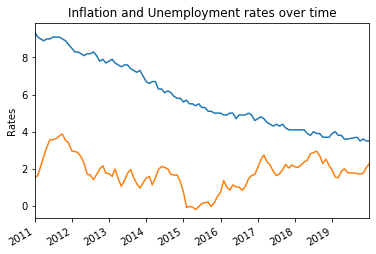

In [16]:

unemploygrp=MasterConcatFinal["Unemployment Rate"]
Inflgrp=MasterConcatFinal["Inflation Rate"]


unemploygrp.plot(title="Inflation and Unemployment rates over time")
Inflgrp.plot()
sns.mpl.pyplot.ylabel("Rates") 
Unemploystd=MasterConcatFinal["Unemployment Rate"].std()
Inflstd=MasterConcatFinal["Inflation Rate"].std()

print(f'The variation in the inflation rate is {Inflstd},it is represented by the orange line in the chart below')
print(f'The variation in the unemployment rate is {Unemploystd}, it is represented by the blue line in the chart below')

In the correlation matrix below, both the median list price and S&P are negatively correlated with the Misery Index but are more negatively correlated with the unemployment rate which is a part of the Misery Index.

In [17]:
MasterConcatFinal.corr()

,medianlistprice,medianpricecut,percentpricecut,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Unemployment Rate,Inflation Rate,Misery Index
medianlistprice,1.000000,-0.159539,0.404225,0.970963,0.968426,0.810541,0.965255,0.061530,0.965139,0.955264,0.727094,0.920686,-0.949853,-0.059507,-0.800162
medianpricecut,-0.159539,1.000000,0.336161,-0.311404,-0.316400,-0.166290,-0.287162,0.189440,-0.332884,-0.351704,-0.157201,-0.251687,0.372173,0.457009,0.486062
percentpricecut,0.404225,0.336161,1.000000,0.341008,0.332969,0.379082,0.368260,0.171438,0.332592,0.313135,0.355700,0.325887,-0.304512,0.040117,-0.232973
S&P Composite,0.970963,-0.311404,0.341008,1.000000,0.977150,0.852788,0.976087,0.073045,0.998350,0.967052,0.781249,0.952476,-0.957881,-0.117209,-0.829681
Dividend,0.968426,-0.316400,0.332969,0.977150,1.000000,0.799626,0.972240,0.004799,0.975458,0.997592,0.715398,0.899531,-0.986933,-0.230230,-0.889990
Earnings,0.810541,-0.166290,0.379082,0.852788,0.799626,1.000000,0.878904,0.283096,0.832434,0.765842,0.990064,0.774437,-0.733091,0.076082,-0.561634
CPI,0.965255,-0.287162,0.368260,0.976087,0.972240,0.878904,1.000000,-0.002409,0.965190,0.955767,0.804834,0.889037,-0.937437,-0.049793,-0.786147
Long Interest Rate,0.061530,0.189440,0.171438,0.073045,0.004799,0.283096,-0.002409,1.000000,0.077679,-0.021605,0.331152,0.240403,0.050107,0.338060,0.175456
Real Price,0.965139,-0.332884,0.332592,0.998350,0.975458,0.832434,0.965190,0.077679,1.000000,0.968726,0.760419,0.960522,-0.964554,-0.151558,-0.848802
Real Dividend,0.955264,-0.351704,0.313135,0.967052,0.997592,0.765842,0.955767,-0.021605,0.968726,1.000000,0.679277,0.890898,-0.992358,-0.279173,-0.914071


In [18]:
MasterConcatFinal["Month_Year"]=pd.to_datetime(MasterConcatFinal.index.values,format="%m-%d-%y")

Below I am running 2 regression models ; one with the median list price and the S&P. I will 
choose the model that best describes the variance in the data. Doing this I am choosing which model also best describes the effect of the feature(s) in the model on the Misery Index.


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats

In [20]:
cleanrealdividend3=MasterConcatFinal['Real Dividend'].dropna(inplace=True)

In [21]:
feature_cols1 = ['medianlistprice']
X1 = MasterConcatFinal[feature_cols1]
feature_cols2 = ['S&P Composite']
X2 = MasterConcatFinal[feature_cols2]


y=MasterConcatFinal['Misery Index']

X1_linreg = LinearRegression()
X1_linreg.fit(X1, y)
X2_linreg = LinearRegression()
X2_linreg.fit(X2, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_predmed = X1_linreg.predict(X1)
y_predsNp = X2_linreg.predict(X2)

score={
       'X1':[],
       'X2':[]
     
        }
score['X1']=['The r2 score is:',metrics.r2_score(y,y_predmed),'for the feature Median List Price']
score['X2']=['The r2 score is:',metrics.r2_score(y,y_predsNp),'for the feature S&P']


scoredf=pd.DataFrame(score)
print(scoredf)

                                  X1                   X2
0                   The r2 score is:     The r2 score is:
1                            0.64026             0.688371
2  for the feature Median List Price  for the feature S&P


The r2 score is better for the model using the feature S&P is better than the model using the feature median list price.

In [24]:
# print the coefficients for the model using the feature S&P
print("The y intercept:", X2_linreg.intercept_)
print("The single coefficient:", X2_linreg.coef_)


print('A one unit change in S&P decreases the misery index by 0.3 percent')

The y intercept: 14.65378925058496
The single coefficient: [-0.00342078]
A one unit change in S&P decreases the misery index by 0.3 percent
